In [1]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.feature_selection import f_classif
import os

import pandas as pd
import numpy as np #ß

import seaborn as sns
import matplotlib.pyplot as plt


def Normalize_dictionaries(sorted_importances_lg):
    # Calculate the total sum of all feature importances
    total_importance = sum(sorted_importances_lg.values())

    # Normalize each feature's importance by dividing it by the total importance
    
    return {k: v/total_importance for k, v in sorted_importances_lg.items()}





I need python version 3.9.17 in order to run 
import pymssql

In [2]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'

# path = "/Users/andreasnilsson/Desktop/Repository Homes/data-behaviour-scorecard/1. Data/1. BSD.sql"

# preprocessor = DataPreprocessor(server, database, username, password) 


# df = preprocessor.fetch_data_from_sql(path)


In [3]:
driver = '{ODBC Driver 17 for SQL Server}' 


server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'

In [4]:

path = "../1. Data"
os.chdir(path)


# from Preprocessing_Application_N import DataPreprocessor

# processor = DataPreprocessor(server, database, username, password, driver)

# # Relative path to the SQL file from the current directory (./2. Python/Classes)
# relative_path_to_sql = "../1. Data/Loan Portfolio Deli.sql"

# # Use the relative path to fetch data
# df = processor.fetch_data_from_sql(relative_path_to_sql)


In [5]:
# df.to_csv('BSC_raw.csv', index=False)

# # Read the CSV file.
# df = pd.read_csv('BSC_raw.csv', skiprows=0)

In [6]:
df = pd.read_csv('BSC_raw.csv', skiprows=0)

In [7]:
filtered_df = df[df['IsOpen'] == 1]

# Step 2: Group by 'SnapshotDate' and count 'AccountNumber' for each group
result = filtered_df.groupby('SnapshotDate')['AccountNumber'].count().reset_index(name='count')
result

,SnapshotDate,count
0,2015-10-31,47
1,2015-11-30,75
2,2015-12-31,90
3,2016-01-31,108
4,2016-02-29,144
...,...,...
97,2023-11-30,9364
98,2023-12-31,9328
99,2024-01-31,9437
100,2024-02-29,9632


In [8]:
df

,SnapshotDate,AccountNumber,IsOpen,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,...,ExposureAtFirstFrozen,forberanceDate,FBE_eftergift,ForberanceIn3Months,ForberanceIn6Months,ForberanceIn9Months,ForberanceIn12Months,Score,RiskClass,Stage
0,2023-03-31,5027438,0,CLOSED,0.00,67.0,2017-08-28,142,0.0,0,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
1,2021-10-31,5198676,0,CLOSED,0.00,44.0,2018-02-16,155,1.0,0,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
2,2021-03-31,5006275,0,CLOSED,0.00,49.0,2017-02-10,96,0.0,0,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
3,2023-01-31,7106859,0,CLOSED,0.00,38.0,2019-11-19,137,0.0,0,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
4,2023-05-31,7221559,1,OPEN,58999.71,29.0,2020-12-29,67,1.0,0,...,NaN,NaN,0,0,0,0,0,1.877308,E3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743675,2021-08-31,5003629,1,OPEN,200187.48,56.0,2016-12-13,123,0.0,0,...,NaN,NaN,0,0,0,0,0,1.877308,E3,1.0
743676,2020-04-30,5010103,1,OPEN,167050.52,36.0,2017-04-13,59,0.0,1,...,NaN,NaN,0,0,0,0,0,1.877308,E3,1.0
743677,2018-08-31,5294970,1,OPEN,134745.64,2.0,2018-06-15,142,0.0,0,...,NaN,NaN,0,0,0,0,0,5.408479,N3,1.0
743678,2023-12-31,5503719,1,OPEN,89664.83,60.0,2018-12-21,60,1.0,0,...,NaN,NaN,0,0,0,0,0,1.877308,E3,1.0


In [9]:
pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])
#df =df[ (df.DisbursedDate >= '2015-01-01') & (df.DisbursedDate <= '2022-06-01') ]

#df =df[df.MOB < 20]

In [10]:
df

,SnapshotDate,AccountNumber,IsOpen,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,CurrentDelinquencyStatus,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirstFrozen,forberanceDate,FBE_eftergift,ForberanceIn3Months,ForberanceIn6Months,ForberanceIn9Months,ForberanceIn12Months,Score,RiskClass,Stage
375860,2015-10-31,5000013,1,OPEN,330530.62,1.0,2015-09-11,95,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
595954,2015-11-30,5000013,1,OPEN,329336.08,2.0,2015-09-11,94,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
562968,2015-12-31,5000013,1,OPEN,103117.75,3.0,2015-09-11,93,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
68845,2016-01-31,5000013,1,OPEN,102727.24,4.0,2015-09-11,92,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
611363,2016-02-29,5000013,1,OPEN,102328.95,5.0,2015-09-11,91,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348890,2024-03-31,9029943,1,OPEN,265000.00,0.0,2024-03-28,144,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,3.880232,N2,1.0
398879,2024-03-31,9029943,1,OPEN,265000.00,0.0,2024-03-28,144,1.0,1,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,3.880232,N2,1.0
26148,2024-03-31,9030057,1,OPEN,113417.00,0.0,2024-03-28,60,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.945136,N1,1.0
547638,2024-03-31,9030057,1,OPEN,113417.00,0.0,2024-03-28,60,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.945136,N1,1.0


In [11]:
df[df.AccountNumber == 7668775].tail(60)  ## main deliqent 7123433 

,SnapshotDate,AccountNumber,IsOpen,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,CurrentDelinquencyStatus,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirstFrozen,forberanceDate,FBE_eftergift,ForberanceIn3Months,ForberanceIn6Months,ForberanceIn9Months,ForberanceIn12Months,Score,RiskClass,Stage
323491,2021-10-31,7668775,0,CLOSED,0.0,24.0,2019-10-30,102,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
729543,2021-10-31,7668775,0,CLOSED,0.0,24.0,2019-10-30,102,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
323956,2021-11-30,7668775,0,CLOSED,0.0,25.0,2019-10-30,102,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
704456,2021-11-30,7668775,0,CLOSED,0.0,25.0,2019-10-30,102,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
19875,2021-12-31,7668775,0,CLOSED,0.0,26.0,2019-10-30,102,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
667930,2021-12-31,7668775,0,CLOSED,0.0,26.0,2019-10-30,102,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
33412,2022-01-31,7668775,0,CLOSED,0.0,27.0,2019-10-30,102,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
133965,2022-01-31,7668775,0,CLOSED,0.0,27.0,2019-10-30,102,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
224000,2022-02-28,7668775,0,CLOSED,0.0,28.0,2019-10-30,102,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
479960,2022-02-28,7668775,0,CLOSED,0.0,28.0,2019-10-30,102,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


## Filter away Main Applicant if we have CO

In [12]:
COCO_acn = df[df.CoappFlag== 1].AccountNumber.drop_duplicates() 
allCOCO = df[df.AccountNumber.isin(COCO_acn)]
onlyMAIN = df[~df['AccountNumber'].isin(COCO_acn)]

onlyCOCO = allCOCO[allCOCO.CoappFlag == 1].copy()

onlyCOCO[onlyCOCO.Ever90 == 1]


cleanAccounts = pd.concat((onlyMAIN,onlyCOCO))

In [13]:
cleanAccounts

,SnapshotDate,AccountNumber,IsOpen,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,CurrentDelinquencyStatus,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirstFrozen,forberanceDate,FBE_eftergift,ForberanceIn3Months,ForberanceIn6Months,ForberanceIn9Months,ForberanceIn12Months,Score,RiskClass,Stage
375860,2015-10-31,5000013,1,OPEN,330530.62,1.0,2015-09-11,95,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
595954,2015-11-30,5000013,1,OPEN,329336.08,2.0,2015-09-11,94,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
562968,2015-12-31,5000013,1,OPEN,103117.75,3.0,2015-09-11,93,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
68845,2016-01-31,5000013,1,OPEN,102727.24,4.0,2015-09-11,92,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
611363,2016-02-29,5000013,1,OPEN,102328.95,5.0,2015-09-11,91,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450555,2024-03-31,9029455,1,OPEN,258653.06,0.0,2024-03-27,60,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.669086,N1,1.0
615871,2024-03-31,9029919,1,OPEN,450000.00,0.0,2024-03-28,144,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1.622251,N1,1.0
607480,2024-03-31,9029935,1,OPEN,70769.00,0.0,2024-03-28,60,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0.669086,N1,1.0
398879,2024-03-31,9029943,1,OPEN,265000.00,0.0,2024-03-28,144,1.0,1,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,3.880232,N2,1.0


In [91]:
FBE_ = cleanAccounts[cleanAccounts.FBE_eftergift == 1]
FBE_no = cleanAccounts[cleanAccounts.FBE_eftergift != 1]

# Step 2: Remove rows from FBE_no that have identical 'SnapshotDate' and 'AccountNumber' in FBE_
# Create a Boolean Series to identify rows to keep in FBE_no
mask = ~FBE_no[['SnapshotDate', 'AccountNumber']].apply(tuple, 1).isin(FBE_[['SnapshotDate', 'AccountNumber']].apply(tuple, 1))
# Apply the mask to filter FBE_no
FBE_no_filtered = FBE_no[mask]

# Step 3: Concatenate FBE_ and FBE_no_filtered into a new DataFrame
df = pd.concat([FBE_, FBE_no_filtered])

In [92]:
df = df.drop_duplicates()




df.Stage

315204    NaN
118178    NaN
563296    NaN
659934    1.0
470225    2.0
         ... 
450555    1.0
615871    1.0
607480    1.0
398879    1.0
547638    1.0
Name: Stage, Length: 546896, dtype: float64

In [93]:
filtered_df = df[df['IsOpen']!= 10]

# Step 2: Group by 'SnapshotDate' and count 'AccountNumber' for each group
result = filtered_df.groupby('SnapshotDate')['AccountNumber'].count().reset_index(name='count')
result

,SnapshotDate,count
0,2015-10-31,35
1,2015-11-30,55
2,2015-12-31,67
3,2016-01-31,82
4,2016-02-29,108
...,...,...
97,2023-11-30,13847
98,2023-12-31,13936
99,2024-01-31,14091
100,2024-02-29,14370


In [94]:
filtered_df = df[df['IsOpen']== 1]

# Step 2: Group by 'SnapshotDate' and count 'AccountNumber' for each group
result = filtered_df.groupby('SnapshotDate')['AccountNumber'].count().reset_index(name='count')
result

,SnapshotDate,count
0,2015-10-31,35
1,2015-11-30,55
2,2015-12-31,67
3,2016-01-31,82
4,2016-02-29,108
...,...,...
97,2023-11-30,6982
98,2023-12-31,6920
99,2024-01-31,6969
100,2024-02-29,7053


In [95]:
nu = df[['AccountNumber','CurrentAmount','IsOpen','AccountStatus','SnapshotDate','Ever90','Stage']]
nu


,AccountNumber,CurrentAmount,IsOpen,AccountStatus,SnapshotDate,Ever90,Stage
315204,7100670,0.00,0,CLOSED,2023-10-31,0,NaN
118178,7100670,0.00,0,CLOSED,2023-11-30,0,NaN
563296,7100670,0.00,0,CLOSED,2023-12-31,0,NaN
659934,7105745,148576.81,1,OPEN,2023-07-31,0,1.0
470225,7105745,148576.81,1,OPEN,2023-08-31,0,2.0
...,...,...,...,...,...,...,...
450555,9029455,258653.06,1,OPEN,2024-03-31,0,1.0
615871,9029919,450000.00,1,OPEN,2024-03-31,0,1.0
607480,9029935,70769.00,1,OPEN,2024-03-31,0,1.0
398879,9029943,265000.00,1,OPEN,2024-03-31,0,1.0


In [96]:
df.drop_duplicates()

fram = df[['AccountNumber','SnapshotDate']]

snapshot_dates = pd.to_datetime(fram['SnapshotDate'] )

# Add 12 months to each date
snapshot_dates_plus_12m = snapshot_dates + pd.DateOffset(months=12)

# The result is in datetime format. If you need it back in string format similar to your input:
snapshot_dates_plus_12m_str = snapshot_dates_plus_12m.dt.strftime('%Y-%m-%d')

fram['SnapshotDate_f12'] = snapshot_dates_plus_12m_str


fram = fram.drop(columns=['SnapshotDate'])

# Sort the DataFrame by 'SnapshotDate_f12'
fram = fram.sort_values(by='SnapshotDate_f12')
fram

/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3028/1073375129.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fram['SnapshotDate_f12'] = snapshot_dates_plus_12m_str


,AccountNumber,SnapshotDate_f12
256828,5000195,2016-10-31
447371,5000138,2016-10-31
428902,5000328,2016-10-31
86059,5000336,2016-10-31
228482,5000385,2016-10-31
...,...,...
557633,7216567,2025-03-31
359850,7545494,2025-03-31
6140,7216575,2025-03-31
385180,7216492,2025-03-31


In [97]:
# Join them 

fram = pd.merge(fram, nu, left_on=['AccountNumber', 'SnapshotDate_f12'], right_on=['AccountNumber', 'SnapshotDate'], how='right')


In [98]:

snapshot_dates = pd.to_datetime(fram['SnapshotDate'] )

# Add 12 months to each date
fram['SnapshotDate']= snapshot_dates - pd.DateOffset(months=12)
fram

,AccountNumber,SnapshotDate_f12,CurrentAmount,IsOpen,AccountStatus,SnapshotDate,Ever90,Stage
0,7100670,2023-10-31,0.00,0,CLOSED,2022-10-31,0,NaN
1,7100670,2023-11-30,0.00,0,CLOSED,2022-11-30,0,NaN
2,7100670,2023-12-31,0.00,0,CLOSED,2022-12-31,0,NaN
3,7105745,2023-07-31,148576.81,1,OPEN,2022-07-31,0,1.0
4,7105745,2023-08-31,148576.81,1,OPEN,2022-08-31,0,2.0
...,...,...,...,...,...,...,...,...
546891,9029455,NaN,258653.06,1,OPEN,2023-03-31,0,1.0
546892,9029919,NaN,450000.00,1,OPEN,2023-03-31,0,1.0
546893,9029935,NaN,70769.00,1,OPEN,2023-03-31,0,1.0
546894,9029943,NaN,265000.00,1,OPEN,2023-03-31,0,1.0


In [99]:
fram = fram.rename(columns={'Ever90': 'Ever90_12'})
fram = fram.rename(columns={'CurrentAmount': 'CurrentAmount_12'})
fram

,AccountNumber,SnapshotDate_f12,CurrentAmount_12,IsOpen,AccountStatus,SnapshotDate,Ever90_12,Stage
0,7100670,2023-10-31,0.00,0,CLOSED,2022-10-31,0,NaN
1,7100670,2023-11-30,0.00,0,CLOSED,2022-11-30,0,NaN
2,7100670,2023-12-31,0.00,0,CLOSED,2022-12-31,0,NaN
3,7105745,2023-07-31,148576.81,1,OPEN,2022-07-31,0,1.0
4,7105745,2023-08-31,148576.81,1,OPEN,2022-08-31,0,2.0
...,...,...,...,...,...,...,...,...
546891,9029455,NaN,258653.06,1,OPEN,2023-03-31,0,1.0
546892,9029919,NaN,450000.00,1,OPEN,2023-03-31,0,1.0
546893,9029935,NaN,70769.00,1,OPEN,2023-03-31,0,1.0
546894,9029943,NaN,265000.00,1,OPEN,2023-03-31,0,1.0


In [100]:



fram =  fram.drop(   columns=['IsOpen','AccountStatus','Stage','SnapshotDate_f12'])  # 
fram

,AccountNumber,CurrentAmount_12,SnapshotDate,Ever90_12
0,7100670,0.00,2022-10-31,0
1,7100670,0.00,2022-11-30,0
2,7100670,0.00,2022-12-31,0
3,7105745,148576.81,2022-07-31,0
4,7105745,148576.81,2022-08-31,0
...,...,...,...,...
546891,9029455,258653.06,2023-03-31,0
546892,9029919,450000.00,2023-03-31,0
546893,9029935,70769.00,2023-03-31,0
546894,9029943,265000.00,2023-03-31,0


In [102]:
fram.Ever90_12.value_counts() 

Ever90_12
0    494268
1     52628
Name: count, dtype: int64

In [103]:
nu['SnapshotDate'] = pd.to_datetime(nu['SnapshotDate'] )

/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_3028/3702015896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nu['SnapshotDate'] = pd.to_datetime(nu['SnapshotDate'] )


In [104]:
fram

igen = pd.merge( nu , fram , on=['AccountNumber','SnapshotDate']  )



In [105]:
igen

,AccountNumber,CurrentAmount,IsOpen,AccountStatus,SnapshotDate,Ever90,Stage,CurrentAmount_12,Ever90_12
0,7184427,43215.80,1,OPEN,2023-02-28,0,2.0,0.00,1
1,7184427,43215.80,1,OPEN,2023-03-31,0,2.0,0.00,1
2,7192586,186313.95,1,OPEN,2023-02-28,0,1.0,188329.15,1
3,7192586,186002.29,1,OPEN,2023-03-31,0,1.0,188329.15,1
4,7238710,196688.11,1,OPEN,2022-12-31,0,1.0,192379.45,0
...,...,...,...,...,...,...,...,...,...
378701,7893761,302559.46,1,OPEN,2023-03-31,0,1.0,298308.57,0
378702,7893985,215000.00,1,OPEN,2023-03-31,0,1.0,200480.54,0
378703,7894835,355000.00,1,OPEN,2023-03-31,0,1.0,0.00,0
378704,7894934,120000.00,1,OPEN,2023-03-31,0,1.0,110842.38,1


In [106]:
igen[igen.IsOpen == 1].SnapshotDate.value_counts()

SnapshotDate
2023-03-31    7072
2023-02-28    7007
2023-01-31    6985
2022-12-31    6918
2022-11-30    6890
              ... 
2016-03-31     127
2016-01-31      82
2015-12-31      67
2015-11-30      55
2015-10-31      35
Name: count, Length: 88, dtype: int64

In [107]:
igen = igen[igen.IsOpen == 1]
igen

,AccountNumber,CurrentAmount,IsOpen,AccountStatus,SnapshotDate,Ever90,Stage,CurrentAmount_12,Ever90_12
0,7184427,43215.80,1,OPEN,2023-02-28,0,2.0,0.00,1
1,7184427,43215.80,1,OPEN,2023-03-31,0,2.0,0.00,1
2,7192586,186313.95,1,OPEN,2023-02-28,0,1.0,188329.15,1
3,7192586,186002.29,1,OPEN,2023-03-31,0,1.0,188329.15,1
4,7238710,196688.11,1,OPEN,2022-12-31,0,1.0,192379.45,0
...,...,...,...,...,...,...,...,...,...
378701,7893761,302559.46,1,OPEN,2023-03-31,0,1.0,298308.57,0
378702,7893985,215000.00,1,OPEN,2023-03-31,0,1.0,200480.54,0
378703,7894835,355000.00,1,OPEN,2023-03-31,0,1.0,0.00,0
378704,7894934,120000.00,1,OPEN,2023-03-31,0,1.0,110842.38,1


In [108]:
data =  igen.copy()

data = data[ (data['Stage'] != 3) & (data['AccountStatus'] !='FROZEN')]

# Convert 'Date' column to datetime format
data['SnapshotDate'] = pd.to_datetime(data['SnapshotDate'])

# # Set the 'Date' column as the index of the DataFrame
data.set_index('SnapshotDate', inplace=True)

temp1 = data[data.Ever90_12 == 1]
temp1 = temp1.drop_duplicates()

temp0 = data[data.Ever90_12 == 0]
temp0 = temp0.drop_duplicates()


# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=3).mean()



# ratio
print(pd.DataFrame(ratio))


                     0
SnapshotDate          
2015-10-31    0.028571
2015-11-30    0.036364
2015-12-31    0.062500
2016-01-31    0.075949
2016-02-29         NaN
...                ...
2022-11-30    0.126423
2022-12-31    0.127228
2023-01-31    0.130088
2023-02-28    0.134400
2023-03-31    0.129709

[90 rows x 1 columns]


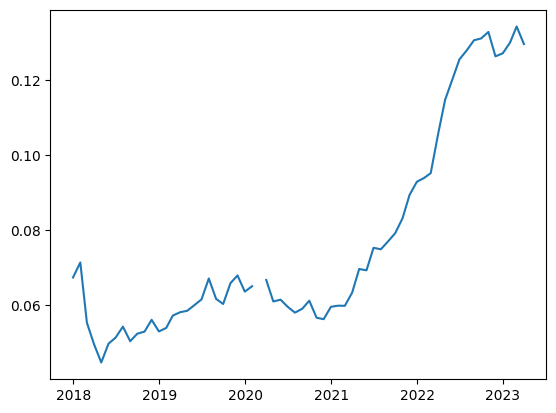

In [109]:
see = pd.DataFrame(ratio)
plt.plot(see[26:])

## Stage 1

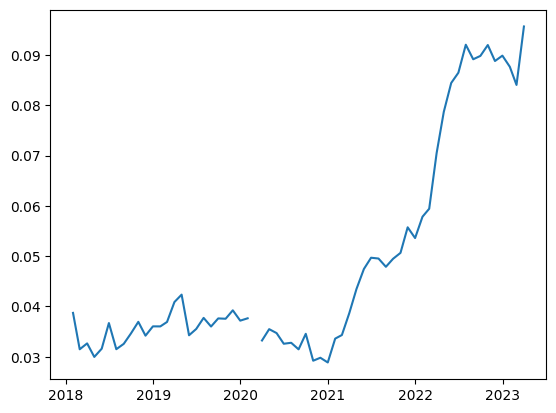

In [111]:
stage_df =  igen[igen.Stage == 1]

data = stage_df.copy()

# Convert 'Date' column to datetime format
data['SnapshotDate'] = pd.to_datetime(stage_df['SnapshotDate'])

# # Set the 'Date' column as the index of the DataFrame
data.set_index('SnapshotDate', inplace=True)

temp1 = data[data.Ever90_12 == 1]
temp1 = temp1.drop_duplicates()

temp0 = data[data.Ever90_12 == 0]
temp0 = temp0.drop_duplicates()




# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=3).mean()



see = pd.DataFrame(ratio)
plt.plot(see)

In [36]:
## stage 2 


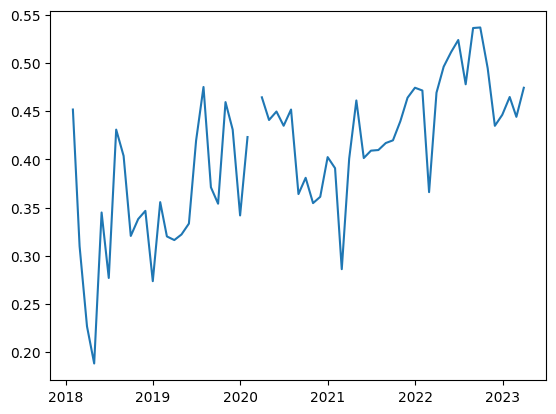

In [112]:
stage_df =  igen[igen.Stage == 2]

data = stage_df.copy()

# Convert 'Date' column to datetime format
data['SnapshotDate'] = pd.to_datetime(stage_df['SnapshotDate'])

# # Set the 'Date' column as the index of the DataFrame
data.set_index('SnapshotDate', inplace=True)

temp1 = data[data.Ever90_12 == 1]
temp1 = temp1.drop_duplicates()

temp0 = data[data.Ever90_12 == 0]
temp0 = temp0.drop_duplicates()




# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=3).mean()



see = pd.DataFrame(ratio)
plt.plot(see)

## 1 & 2 

In [113]:
igen = igen.drop_duplicates()

igen.SnapshotDate.value_counts()

SnapshotDate
2023-03-31    7072
2023-02-28    7007
2023-01-31    6985
2022-12-31    6918
2022-11-30    6890
              ... 
2016-03-31     127
2016-01-31      82
2015-12-31      67
2015-11-30      55
2015-10-31      35
Name: count, Length: 88, dtype: int64

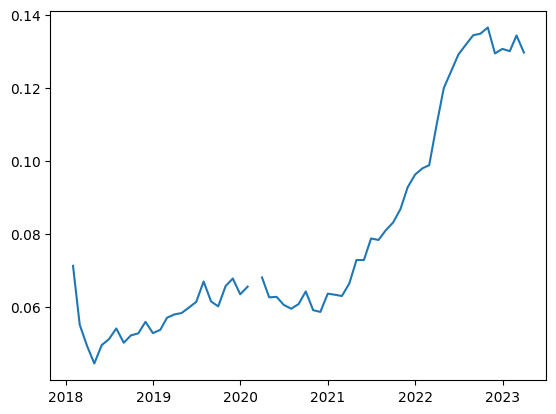

In [114]:
stage_df =  igen[igen.Stage.isin([1,2])]

data = stage_df.copy()

# Convert 'Date' column to datetime format
data['SnapshotDate'] = pd.to_datetime(stage_df['SnapshotDate'])

# # Set the 'Date' column as the index of the DataFrame
data.set_index('SnapshotDate', inplace=True)

temp1 = data[data.Ever90_12 == 1]
temp1 = temp1.drop_duplicates()

temp0 = data[data.Ever90_12 == 0]
temp0 = temp0.drop_duplicates()


# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=3).mean()



see = pd.DataFrame(ratio)
plt.plot(see)

In [116]:
igen.to_excel('igen.xlsx')

## Current amount 

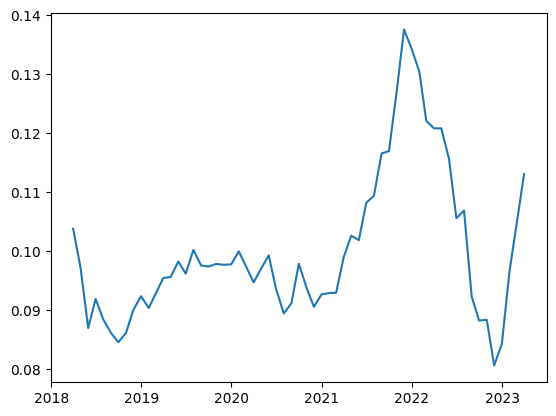

In [396]:

grouped_sum.index = grouped_sum.SnapshotDate

see = pd.DataFrame(grouped_sum['Deli_%'])


plt.plot(see[28:])

In [70]:
igen.Ever90.value_counts()

,AccountNumber,CurrentAmount,IsOpen,AccountStatus,SnapshotDate
315204,7100670,0.00,0,CLOSED,2023-10-31
118178,7100670,0.00,0,CLOSED,2023-11-30
563296,7100670,0.00,0,CLOSED,2023-12-31
659934,7105745,148576.81,1,OPEN,2023-07-31
470225,7105745,148576.81,1,OPEN,2023-08-31
...,...,...,...,...,...
450555,9029455,258653.06,1,OPEN,2024-03-31
615871,9029919,450000.00,1,OPEN,2024-03-31
607480,9029935,70769.00,1,OPEN,2024-03-31
398879,9029943,265000.00,1,OPEN,2024-03-31


In [30]:
result_df

,AccountNumber,CurrentAmount_x,IsOpen_x,AccountStatus_x,SnapshotDate_x,SnapshotDate_f12,SnapshotDate_y,IsOpen_y,AccountStatus_y,CurrentAmount_y,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,CurrentDelinquencyStatus,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirstFrozen,forberanceDate,FBE_eftergift,ForberanceIn3Months,ForberanceIn6Months,ForberanceIn9Months,ForberanceIn12Months,Score,RiskClass,Stage
0,7184427,43215.80,1,OPEN,2023-03-31,2024-03-31,2024-03-31,0,CLOSED,0.00,44.0,2020-07-28,117,0.0,0,1,9,366.0,336.0,305.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-15,0,0,0,0,0,NaN,NaN,NaN
1,7192586,186002.29,1,OPEN,2023-03-31,2024-03-31,2024-03-31,1,FROZEN,188329.15,43.0,2020-08-28,167,0.0,0,1,9,91.0,60.0,31.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08,0,0,0,0,0,100.000000,E8,3.0
2,7238710,196688.11,1,OPEN,2022-12-31,2023-12-31,2023-12-31,1,OPEN,192379.45,33.0,2021-03-03,168,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-15,0,0,0,0,0,3.654435,E4,1.0
3,7238710,196224.35,1,OPEN,2023-01-31,2024-01-31,2024-01-31,1,OPEN,192286.27,34.0,2021-03-03,167,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-15,0,0,0,0,0,3.654435,E4,1.0
4,7238710,195326.28,1,OPEN,2023-03-31,2024-03-31,2024-03-31,1,OPEN,192093.29,36.0,2021-03-03,165,0.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-15,0,0,0,0,0,3.654435,E4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368587,7893761,302559.46,1,OPEN,2023-03-31,2024-03-31,2024-03-31,1,OPEN,298308.57,12.0,2023-03-29,168,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1.484099,E3,1.0
368588,7893985,215000.00,1,OPEN,2023-03-31,2024-03-31,2024-03-31,1,OPEN,200480.54,12.0,2023-03-30,168,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1.877308,E3,1.0
368589,7894835,355000.00,1,OPEN,2023-03-31,2024-03-31,2024-03-31,0,CLOSED,0.00,12.0,2023-03-31,0,1.0,0,1,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
368590,7894934,120000.00,1,OPEN,2023-03-31,2024-03-31,2024-03-31,1,FROZEN,110842.38,12.0,2023-03-31,108,1.0,0,1,9,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,100.000000,E8,3.0


In [183]:
utan = igen[(igen.IsOpen == 1) &(igen.Ever90 == 0)  ]


In [187]:
# Convert 'Date' column to datetime format
# data['SnapshotDate'] = pd.to_datetime(data['SnapshotDate'])

# # Set the 'Date' column as the index of the DataFrame
# data.set_index('SnapshotDate', inplace=True)

temp1 = utan[utan.Ever90_12 == 1]
temp1 = temp1.drop_duplicates()

temp0 = utan[utan.Ever90_12 == 0]
temp0 = temp0.drop_duplicates()




# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=6).mean()



# ratio
print(pd.DataFrame(ratio))


                     0
SnapshotDate          
2015-10-31    0.028571
2015-11-30    0.036364
2015-12-31    0.062500
2016-01-31    0.075949
2016-02-29         NaN
...                ...
2022-11-30    0.104167
2022-12-31    0.106310
2023-01-31    0.107924
2023-02-28         NaN
2023-03-31    0.129353

[90 rows x 1 columns]


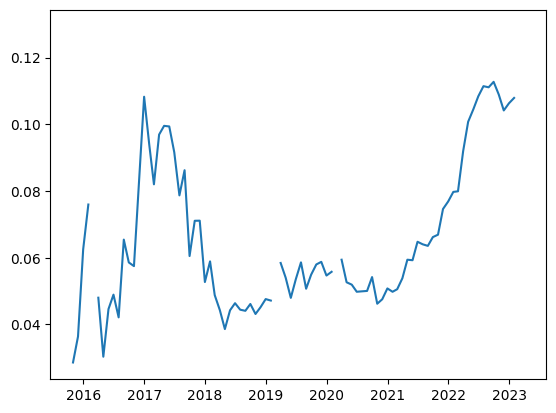

In [188]:
see = pd.DataFrame(ratio)
plt.plot(see)

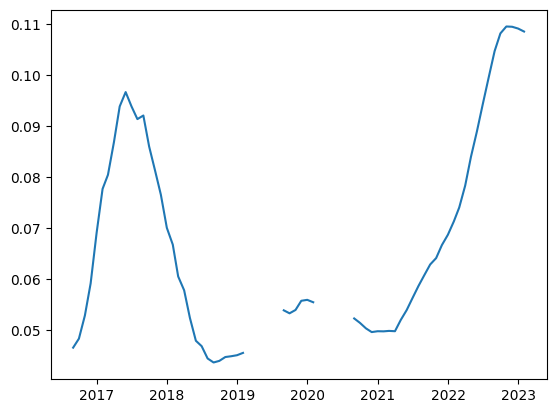

In [189]:
see = pd.DataFrame(rolling_mean)
plt.plot(see)

In [56]:
cleanAccounts = df[df.MOB > 2]

toKeep = cleanAccounts[['AccountNumber','SnapshotDate','MOB','DisbursedDate','AccountStatus','Ever90','CoappFlag','TimeSince30'	,'TimeSince60','Ever30In6Months','Ever30In12Months','Ever30','Ever60In6Months','Ever60In12Months','Ever60',
                    
                 	
                    
#'P_calibrated' 

'WorstDelinquency6M',	'WorstDelinquency12M',	'WorstDelinquency','CurrentDelinquencyStatus', 'Score' 
                    ]]

toKeep.loc[toKeep['TimeSince30'].isna(), 'TimeSince30'] = 0
toKeep.loc[toKeep['TimeSince60'].isna(), 'TimeSince60'] = 0

## 'AccountNumber','MOB',   ,'WorstDelinquency6M',	'WorstDelinquency12M',	'WorstDelinquency',   ,'Ever30After48Months','Ever60After48Months' 'Ever30After12Months'	,'Ever60After12Months','Ever30After24Months',	'Ever60After24Months','Ever30After36Months','Ever60After36Months'

In [57]:
np.min(toKeep.SnapshotDate)

'2015-12-31'

In [58]:
toKeep

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,Ever90,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score
315204,7100670,2023-10-31,48.0,2019-10-23,CLOSED,0,0.0,31.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
118178,7100670,2023-11-30,49.0,2019-10-23,CLOSED,0,0.0,61.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
563296,7100670,2023-12-31,50.0,2019-10-23,CLOSED,0,0.0,92.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
659934,7105745,2023-07-31,44.0,2019-11-13,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
470225,7105745,2023-08-31,45.0,2019-11-13,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,27.662599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358136,7988504,2024-03-31,3.0,2023-12-22,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
440040,7988553,2024-03-31,3.0,2023-12-27,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099
121229,7988900,2024-03-31,3.0,2023-12-29,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099
402881,7989437,2024-03-31,3.0,2023-12-28,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099


In [59]:
set(toKeep.AccountStatus)

{'CLOSED', 'FROZEN', 'OPEN'}

In [60]:
toKeep[toKeep.AccountNumber == 7100670   ]  # 5513502 5544507

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,Ever90,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score
315204,7100670,2023-10-31,48.0,2019-10-23,CLOSED,0,0.0,31.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
118178,7100670,2023-11-30,49.0,2019-10-23,CLOSED,0,0.0,61.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
563296,7100670,2023-12-31,50.0,2019-10-23,CLOSED,0,0.0,92.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
231050,7100670,2020-01-31,3.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
356918,7100670,2020-02-29,4.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
560427,7100670,2020-03-31,5.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
633315,7100670,2020-04-30,6.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
548694,7100670,2020-05-31,7.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
270439,7100670,2020-06-30,8.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
483867,7100670,2020-07-31,9.0,2019-10-23,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843


In [61]:
AccountNR = 7100670


def runAccount(toKeep,AccountNR):

    account = toKeep[(toKeep.AccountNumber == AccountNR ) ]

    healthy = account[(account.Ever90 == 0) & (account.AccountStatus =='OPEN')]

    if len(healthy[healthy.Ever90 == 0]) == 0 :
        return

    for i in range(100):

        randomhealthyMOB =   healthy.MOB.sample().values[0]
        randomhealthyMOB_P12 = randomhealthyMOB+12

        inputRow = healthy[healthy.MOB == randomhealthyMOB]

        if (len(account[account.MOB == randomhealthyMOB_P12]) == 1) :   
            #print('ja')
            break


    inputRow =  inputRow.drop(columns='Ever90')

    inputRow['Ever90_12M'] = account[account.MOB == randomhealthyMOB_P12].Ever90.iloc[0]

    return inputRow


In [33]:
AccountNR = 5253166    #7733249


account = toKeep[(toKeep.AccountNumber == AccountNR ) ]


In [34]:
account

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,Ever90,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score
278381,5253166,2018-07-31,3.0,2018-04-19,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
322089,5253166,2018-08-31,4.0,2018-04-19,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
287836,5253166,2018-09-30,5.0,2018-04-19,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
553046,5253166,2018-10-31,6.0,2018-04-19,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
594512,5253166,2018-11-30,7.0,2018-04-19,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11921,5253166,2023-11-30,67.0,2018-04-19,CLOSED,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,NaN
491097,5253166,2023-12-31,68.0,2018-04-19,CLOSED,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,NaN
50598,5253166,2024-01-31,69.0,2018-04-19,CLOSED,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,NaN
489862,5253166,2024-02-29,70.0,2018-04-19,CLOSED,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,NaN


In [67]:
data = pd.DataFrame()
current = pd.DataFrame()


for s in set(toKeep.SnapshotDate):

    current = toKeep[toKeep.SnapshotDate == s]

    for AccountNR in  set(current.AccountNumber):
        #print(AccountNR)
        data = pd.concat([data,  runAccount(toKeep,AccountNR)])

KeyboardInterrupt: 

In [ ]:
data.to_csv('Processed.csv', index=False)

# # Read the CSV file.
df = pd.read_csv('Processed.csv', skiprows=0)

In [65]:
toKeep

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,Ever90,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score
315204,7100670,2023-10-31,48.0,2019-10-23,CLOSED,0,0.0,31.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
118178,7100670,2023-11-30,49.0,2019-10-23,CLOSED,0,0.0,61.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
563296,7100670,2023-12-31,50.0,2019-10-23,CLOSED,0,0.0,92.0,0.0,1,1,1,0,0,0,2,2,2,0,NaN
659934,7105745,2023-07-31,44.0,2019-11-13,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843
470225,7105745,2023-08-31,45.0,2019-11-13,OPEN,0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,27.662599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358136,7988504,2024-03-31,3.0,2023-12-22,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308
440040,7988553,2024-03-31,3.0,2023-12-27,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099
121229,7988900,2024-03-31,3.0,2023-12-29,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099
402881,7989437,2024-03-31,3.0,2023-12-28,OPEN,0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099


Test

In [62]:
import pandas as pd
import numpy as np

# Placeholder DataFrame setup
# Replace this with your actual DataFrame loading or preparation
np.random.seed(42)  # For reproducibility


# Sample 5% of random accounts
unique_accounts = toKeep['AccountNumber'].unique()
sample_size = int(len(unique_accounts) * 0.05)
sampled_accounts = np.random.choice(unique_accounts, size=sample_size, replace=False)

# Filter toKeep for sampled accounts
sampled_toKeep = toKeep[toKeep['AccountNumber'].isin(sampled_accounts)]


In [64]:


from multiprocessing import Pool, cpu_count
import pandas as pd

AccountNR = 7100670


def runAccount(toKeep,AccountNR):

    account = toKeep[(toKeep.AccountNumber == AccountNR ) ]

    healthy = account[(account.Ever90 == 0) & (account.AccountStatus =='OPEN')]

    if len(healthy[healthy.Ever90 == 0]) == 0 :
        return

    for i in range(100):

        randomhealthyMOB =   healthy.MOB.sample().values[0]
        randomhealthyMOB_P12 = randomhealthyMOB+12

        inputRow = healthy[healthy.MOB == randomhealthyMOB]

        if (len(account[account.MOB == randomhealthyMOB_P12]) == 1) :   
            #print('ja')
            break


    inputRow =  inputRow.drop(columns='Ever90')

    inputRow['Ever90_12M'] = account[account.MOB == randomhealthyMOB_P12].Ever90.iloc[0]

    return inputRow


def runAccount(toKeep, AccountNR):
    # Simulate retrieving a filtered DataFrame (replace with your logic)
    result = toKeep[toKeep['AccountNumber'] == AccountNR]
    if not result.empty:
        return result
    else:
        return pd.DataFrame()  # Return an empty DataFrame instead of None

def process_account_numbers(args):
    toKeep, AccountNR = args
    return runAccount(toKeep, AccountNR)




# Placeholder DataFrame setup
# Replace this with your actual DataFrame loading or preparation
np.random.seed(42)  # For reproducibility


# Sample 5% of random accounts
unique_accounts = toKeep['AccountNumber'].unique()
sample_size = int(len(unique_accounts) * 0.05)
sampled_accounts = np.random.choice(unique_accounts, size=sample_size, replace=False)

# Filter toKeep for sampled accounts
sampled_toKeep = toKeep[toKeep['AccountNumber'].isin(sampled_accounts)]



if __name__ == '__main__':
    # Assuming sampled_toKeep is defined and contains data
    tasks = [(sampled_toKeep, acc_nr) for acc_nr in sampled_toKeep['AccountNumber'].unique()]

    with Pool(processes=cpu_count()) as pool:
        results = pool.starmap(process_account_numbers, tasks)
        
    # Only attempt concatenation if results are not empty
    if results:
        final_result = pd.concat(results, ignore_index=True)
        print(final_result.head())  # Print head for brevity
    else:
        print("No data to concatenate.")


Process SpawnPoolWorker-155:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'process_account_numbers' on <module '__main__' (built-in)>
Process SpawnPoolWorker-157:
Traceback (most recent call last):
  File "/Library/Developer/CommandLine

KeyboardInterrupt: 

In [165]:
df = df.drop_duplicates()

see = df.SnapshotDate.value_counts()

see


SnapshotDate
2022-08-31    4056
2022-07-31    3899
2022-09-30    3894
2022-06-30    3776
2022-10-31    3753
              ... 
2016-04-30      83
2016-03-31      67
2016-02-29      51
2016-01-31      33
2015-12-31      16
Name: count, Length: 88, dtype: int64

In [151]:
df[df.SnapshotDate == np.max(df.SnapshotDate)]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
257,5015185,2023-03-31,69.0,2017-06-08,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,1
671,5509294,2023-03-31,51.0,2018-12-14,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
674,5738679,2023-03-31,48.0,2019-03-29,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,13.185339,0
706,7147895,2023-03-31,36.0,2020-03-20,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,1.877308,0
758,7181001,2023-03-31,32.0,2020-07-20,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445536,7107337,2023-03-31,40.0,2019-11-22,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,1
445649,7107824,2023-03-31,40.0,2019-11-20,OPEN,1.0,396.0,0.0,0,0,1,0,0,0,1,1,2,0,3.126808,0
445805,7665565,2023-03-31,41.0,2019-10-24,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,0
446082,5012497,2023-03-31,70.0,2017-05-18,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1.877308,0


In [152]:
df

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
0,5079058,2022-09-30,56.0,2018-01-29,OPEN,1.0,1035.0,0.0,0,0,1,0,0,0,0,0,2,0,1.877308,0
1,5799960,2022-10-31,42.0,2019-04-17,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,1.877308,0
2,5046297,2018-06-30,7.0,2017-11-14,OPEN,0.0,0.0,0.0,1,1,1,0,0,0,2,2,2,2,41.700000,1
3,5505052,2019-03-31,3.0,2018-12-13,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,0
4,5767199,2020-02-29,10.0,2019-04-17,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446274,7208754,2022-03-31,16.0,2020-11-04,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308,0
446291,7110521,2021-10-31,23.0,2019-11-27,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.484099,0
446293,5209994,2020-02-29,23.0,2018-03-06,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
446311,7241698,2022-01-31,10.0,2021-03-23,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,0


In [153]:
df[df.AccountNumber ==5046297]  

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
2,5046297,2018-06-30,7.0,2017-11-14,OPEN,0.0,0.0,0.0,1,1,1,0,0,0,2,2,2,2,41.700000,1
5162,5046297,2018-04-30,5.0,2017-11-14,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,23.142363,1
13844,5046297,2018-02-28,3.0,2017-11-14,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,1
40003,5046297,2018-05-31,6.0,2017-11-14,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,27.662599,1
49744,5046297,2018-07-31,8.0,2017-11-14,OPEN,0.0,0.0,0.0,1,1,1,0,0,0,2,2,2,2,41.700000,1
59485,5046297,2018-09-30,10.0,2017-11-14,OPEN,0.0,61.0,0.0,1,1,1,1,1,1,3,3,3,3,64.500000,1
91633,5046297,2018-03-31,4.0,2017-11-14,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,1
106856,5046297,2018-08-31,9.0,2017-11-14,OPEN,0.0,31.0,0.0,1,1,1,1,1,1,3,3,3,3,64.500000,1


In [154]:
data =  df[(df.SnapshotDate > '2017-03-01') & (df.SnapshotDate < '2023-06-01')]

min(data.SnapshotDate)



see = df[df.SnapshotDate == '2022-08-31' ]

see[see.AccountNumber ==7182686]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
1020,7182686,2022-08-31,25.0,2020-07-22,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0


In [155]:
len(set(see.AccountNumber))

4056

In [156]:
# Convert 'Date' column to datetime format
data['SnapshotDate'] = pd.to_datetime(data['SnapshotDate'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('SnapshotDate', inplace=True)

temp1 = data[data.Ever90_12M == 1]
temp1 = temp1.drop_duplicates()

temp0 = data[data.Ever90_12M == 0]
temp0 = temp0.drop_duplicates()




# Get the monthly counts
monthly_counts1 = temp1.resample('ME').size()

# Get the monthly counts
monthly_counts0 = temp0.resample('ME').size()

# Compute the ratio
ratio = (monthly_counts1 / (monthly_counts0 +monthly_counts1))

# Compute the rolling mean over 4 months
rolling_mean = ratio.rolling(window=3).mean()



# ratio
print(pd.DataFrame(ratio))


                     0
SnapshotDate          
2017-03-31    0.109827
2017-04-30    0.114883
2017-05-31    0.121495
2017-06-30    0.148248
2017-07-31    0.140665
...                ...
2022-11-30    0.162056
2022-12-31    0.162797
2023-01-31    0.160122
2023-02-28    0.173941
2023-03-31    0.167716

[73 rows x 1 columns]


/var/folders/xv/px633rpn27q5n8m3579ly8dm0000gn/T/ipykernel_28056/712729084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SnapshotDate'] = pd.to_datetime(data['SnapshotDate'])


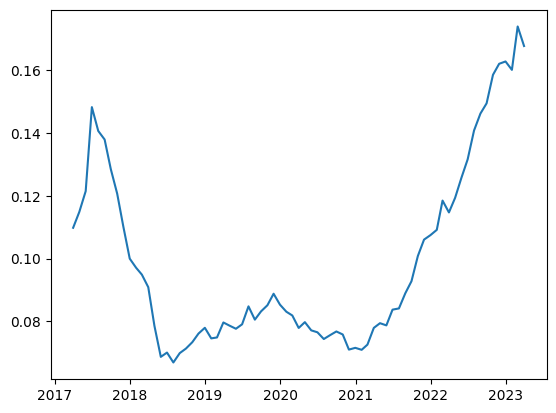

In [157]:
plt.plot(ratio)

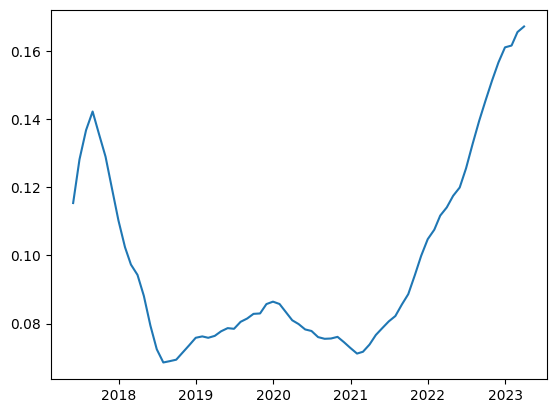

In [158]:
plt.plot(rolling_mean)

In [104]:
data[data.Score > -1]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,AccountStatus,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
623437,7241730,2021-08-31,5.0,2021-03-12,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
626410,7274509,2021-09-30,3.0,2021-06-28,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
248210,7700495,2022-10-31,10.0,2021-12-16,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,4.595843,0
275897,7733264,2023-01-31,10.0,2022-03-22,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,3.654435,0
50498,5079058,2019-11-30,22.0,2018-01-29,OPEN,1.0,0.0,0.0,1,1,1,0,0,0,2,2,2,2,41.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431381,7143407,2020-06-30,3.0,2020-03-06,OPEN,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.877308,0
59697,5406707,2020-02-29,16.0,2018-10-11,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
63793,7110646,2020-03-31,4.0,2019-11-29,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,4.595843,0
522747,5079033,2020-10-31,33.0,2018-01-26,OPEN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,4.595843,0


In [105]:

earlier = data[data.DisbursedDate < '2020-01-01']


np.mean(earlier.MOB)

14.807186234817813

In [29]:
data


data.DisbursedDate

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
228421,7733249,2022-08-31,5,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.061602,1,1,1,0,NaN,0
157025,7241730,2022-03-31,12,2021-03-12,0,0.0,0.0,0,0,0,0,0,0,0.059782,0,1,1,0,NaN,0
177340,7274509,2022-01-31,7,2021-06-28,0,0.0,0.0,0,0,0,0,0,0,0.169907,0,1,1,0,4.595843,0
214623,7700495,2022-03-31,3,2021-12-16,0,0.0,0.0,0,0,0,0,0,0,0.060270,1,1,1,0,4.595843,0
228443,7733264,2022-08-31,5,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.052036,0,0,0,0,3.654435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312375,7143407,2021-01-31,10,2020-03-06,1,0.0,0.0,0,0,0,0,0,0,0.047438,1,1,1,0,1.877308,0
29345,5406707,2021-12-31,38,2018-10-11,0,0.0,0.0,0,0,0,0,0,0,0.051629,0,0,1,0,NaN,0
79197,7110646,2022-05-31,30,2019-11-29,0,0.0,0.0,0,0,0,0,0,0,0.045480,0,0,1,0,NaN,0
2769,5079033,2022-04-30,51,2018-01-26,0,0.0,0.0,0,0,0,0,0,0,0.054885,0,1,1,0,NaN,0


In [27]:
import pandas as pd

# Assuming 'toKeep' is your DataFrame
for column in toKeep.columns:
    if toKeep[column].isna().any():
        print(f"Column '{column}' contains NaN values.")


Column 'Score' contains NaN values.


## Filter away MOB < 3 

In [28]:
saved = data.copy()

# Feature Importance


In [29]:
notinlist = ['AccountNumber','DisbursedDate','SnapshotDate','Score','Ever90_12M']  # 'MOB',

X, Y = data.drop(columns=notinlist), data['Ever90_12M']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
Xtrain = scaler.fit_transform(X)


In [30]:
# ANOVA analysis to perform Feature filter method selection

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(Xtrain, Y)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': data.drop(columns=notinlist).columns.values,
                                     'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})

ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

# save the top 20 numerical features in a list
top_20_features = ANOVA_F_table.iloc[:20, 0].to_list()

ANOVA_F_table.head(30)

,Numerical_Feature,F-Score,p values
0,CurrentDelinquencyStatus,4219.558346,0.000000
1,Ever30In6Months,2816.033545,0.000000
2,Ever30In12Months,2548.790446,0.000000
3,Ever30,2136.424389,0.000000
4,WorstDelinquency6M,2041.000688,0.000000
5,WorstDelinquency12M,1681.751577,0.000000
6,WorstDelinquency,1198.439926,0.000000
7,Ever60In6Months,1174.988980,0.000000
8,Ever60In12Months,1101.591332,0.000000
9,Ever60,1037.031851,0.000000


## Gradient Boost 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.05,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 100,'n_estimators': 50,'subsample': 0.6}

bgc_tuned = GradientBoostingClassifier(
    criterion=best_params['criterion'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_estimators=best_params.get('n_estimators', 15),  # Default value if not in grid
    subsample=best_params.get('subsample', 1.0)         # Default value if not in grid
)

# train
bgc_tuned.fit(Xtrain, Y)


GradientBoostingClassifier(learning_rate=0.05, max_depth=15,
                           max_features='log2', min_samples_leaf=100,
                           n_estimators=50, subsample=0.6)

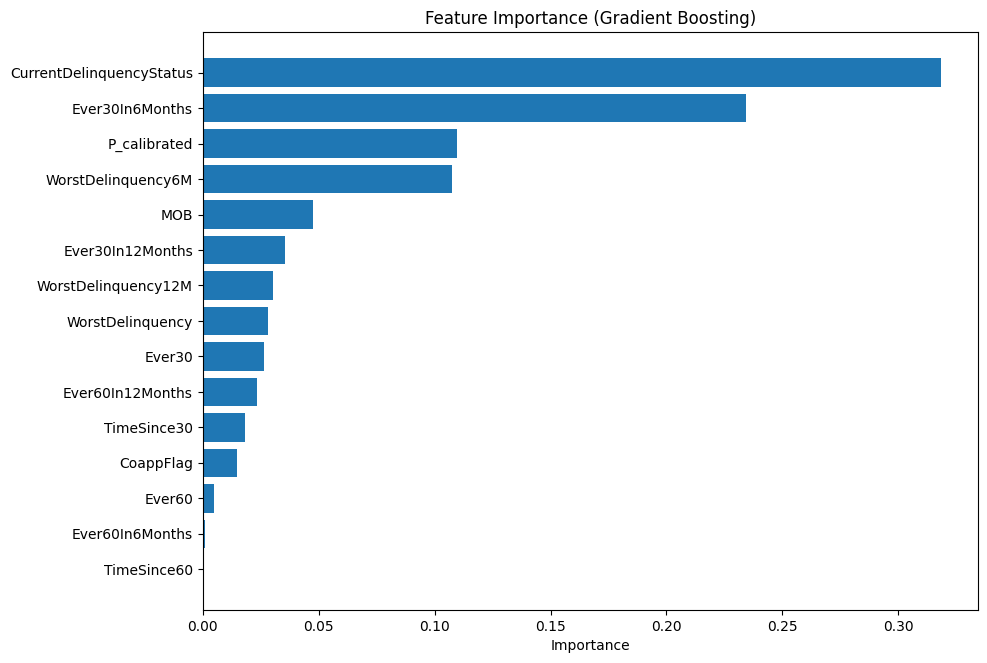

In [32]:

import matplotlib.pyplot as plt
# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_


# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_

feature_names = X.columns
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))



    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))



# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_bgc = Normalize_dictionaries(importance_dict)


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()




In [33]:


sum(sorted_importances_bgc.values())

1.0

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters
best_params = {'bootstrap': True,'criterion': 'gini','max_depth': 10,'max_features': 6,'min_samples_leaf': 1,'min_samples_split': 30,'n_estimators': 50}

# Create tuned RFC model using best parameters
rfr_tune = RandomForestClassifier(**best_params)
rfr_tune.fit(Xtrain, Y)


RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=30,
                       n_estimators=50)

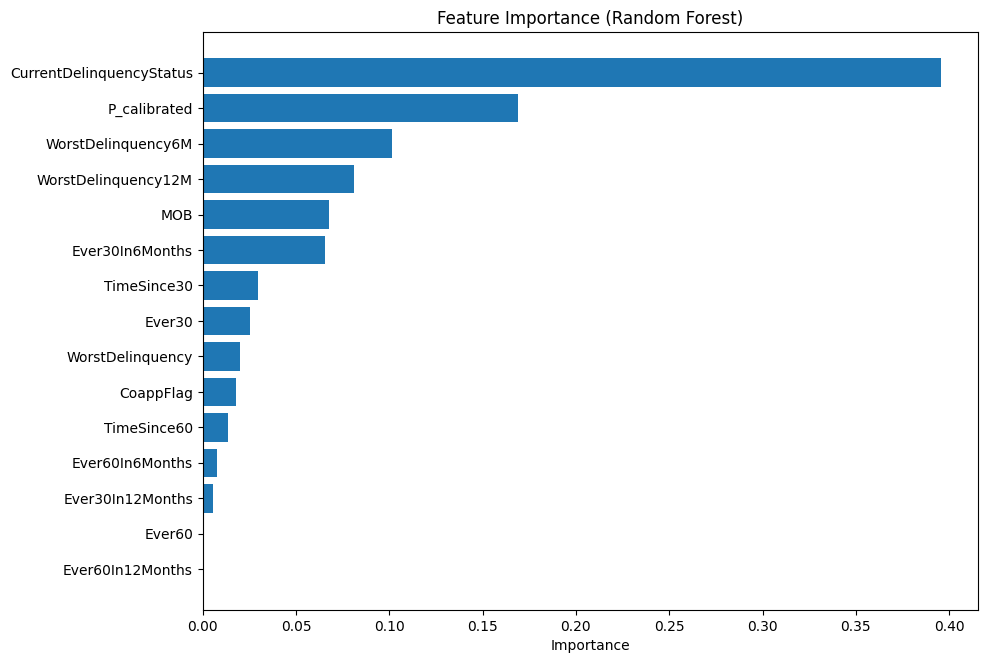

In [35]:

# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = rfr_tune.feature_importances_
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()


# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_rfs = Normalize_dictionaries(importance_dict)


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming you have your data loaded in Xtrain and Ytrain

# Hyperparameters you've determined
best_params = {'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create and fit the Logistic Regression model using the best parameters
lr_tuned = LogisticRegression(**best_params)
lr_tuned.fit(Xtrain, Y)

# Cross-validated score (assuming 5-fold cross validation for example)
#CVS_LR_Tuned = cross_val_score(lr_tuned, Xtrain, Ytrain, cv=5)
#print("Cross-validated score for tuned Logistic Regression:", CVS_LR_Tuned.mean())


LogisticRegression(C=0.001, max_iter=1000000)

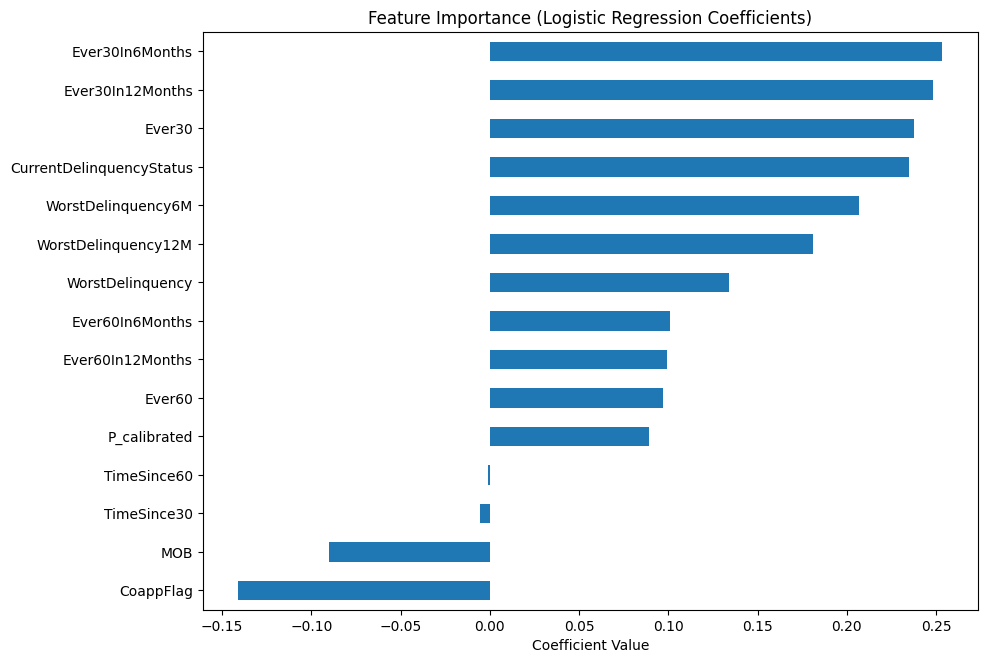

In [37]:
import matplotlib.pyplot as plt

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

feature_importance = pd.Series(coefficients, index=feature_names).sort_values()

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()




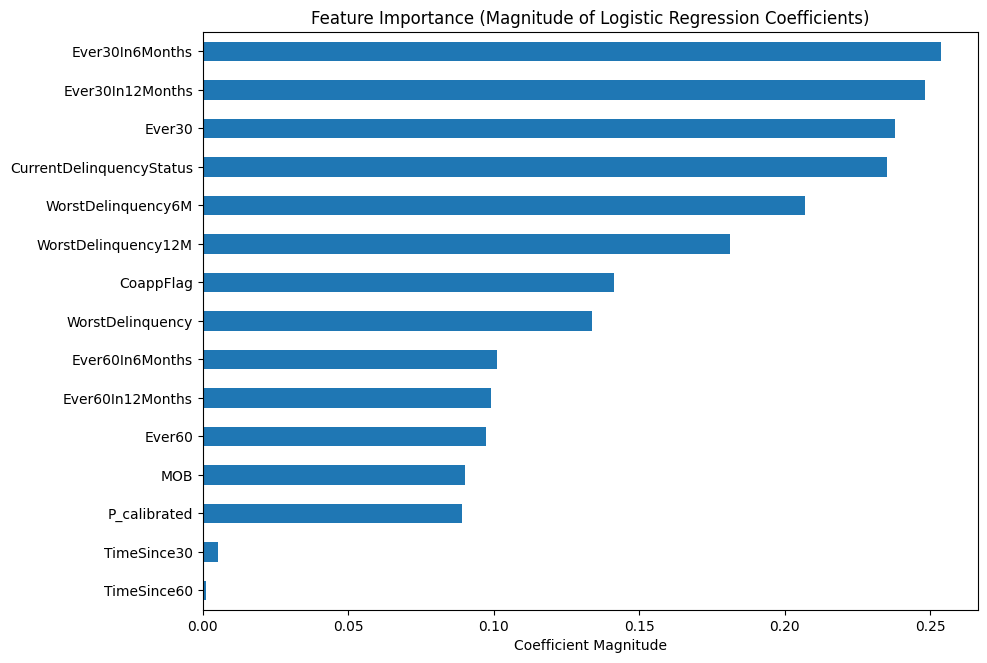

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

# Compute the absolute values of the coefficients to get the magnitude of importance
feature_magnitude = pd.Series(abs(coefficients), index=feature_names)

# Sort by magnitude
sorted_features = feature_magnitude.sort_values(ascending=True)
sorted_importances_lg = Normalize_dictionaries(dict(sorted_features))


# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
sorted_features.plot(kind='barh')
plt.title('Feature Importance (Magnitude of Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.show()

In [39]:
# Convert DataFrame to dictionary
sorted_importances_Anova = dict(zip(ANOVA_F_table['Numerical_Feature'], ANOVA_F_table['F-Score']))
sorted_importances_Anova

sorted_importances_Anova = Normalize_dictionaries(sorted_importances_Anova)
sorted_importances_Anova
# Drop 'Age' from all dictionaries

#sorted_importances_dct.pop('AccountNumber', None)
sorted_importances_bgc.pop('AccountNumber', None)
sorted_importances_rfs.pop('AccountNumber', None)
sorted_importances_lg.pop('AccountNumber', None)
sorted_importances_Anova.pop('AccountNumber', None)

# Drop 'Age' from all dictionaries
for i in ['AccountNumber','degenerate_application_id','Gender']:
    

    #sorted_importances_dct.pop(i, None)
    sorted_importances_bgc.pop(i, None)
    sorted_importances_rfs.pop(i, None)
    sorted_importances_lg.pop(i, None)
    sorted_importances_Anova.pop(i, None)



In [40]:
import plotly.graph_objects as go

# ... Your data for sorted_importances_dct, sorted_importances_bgc, etc. ...

# Combining dictionaries
combined_dict = {
    #'DCT': sorted_importances_dct,
    'BGC': sorted_importances_bgc,
    'RFS': sorted_importances_rfs,
    'LG': sorted_importances_lg,
    'ANOVA': sorted_importances_Anova
}

# Calculate cumulative importance for each feature
cumulative_importance = {}
for feature in sorted_importances_bgc.keys():
    cumulative_importance[feature] = sum(d[feature] for d in combined_dict.values())

# Sort features by cumulative importance
sorted_features = sorted(cumulative_importance, key=cumulative_importance.get, reverse=True)

# Plotting the stacked bar chart:
fig = go.Figure()

for method, importances in combined_dict.items():
    values = [importances.get(feature, 0) for feature in sorted_features]
    fig.add_trace(go.Bar(
        x=sorted_features,
        y=values,
        name=method
    ))

fig.update_layout(
    title="Feature Importances by Method",
    barmode='stack',
    xaxis_title="Features",
    yaxis_title="Importance",
    xaxis={'categoryorder':'total descending', 'tickangle': 45}, # Adjust tick angle for better readability
    width=1800,  # Adjust width
    height=800   # Adjust height
)
fig.show()


<Axes: >

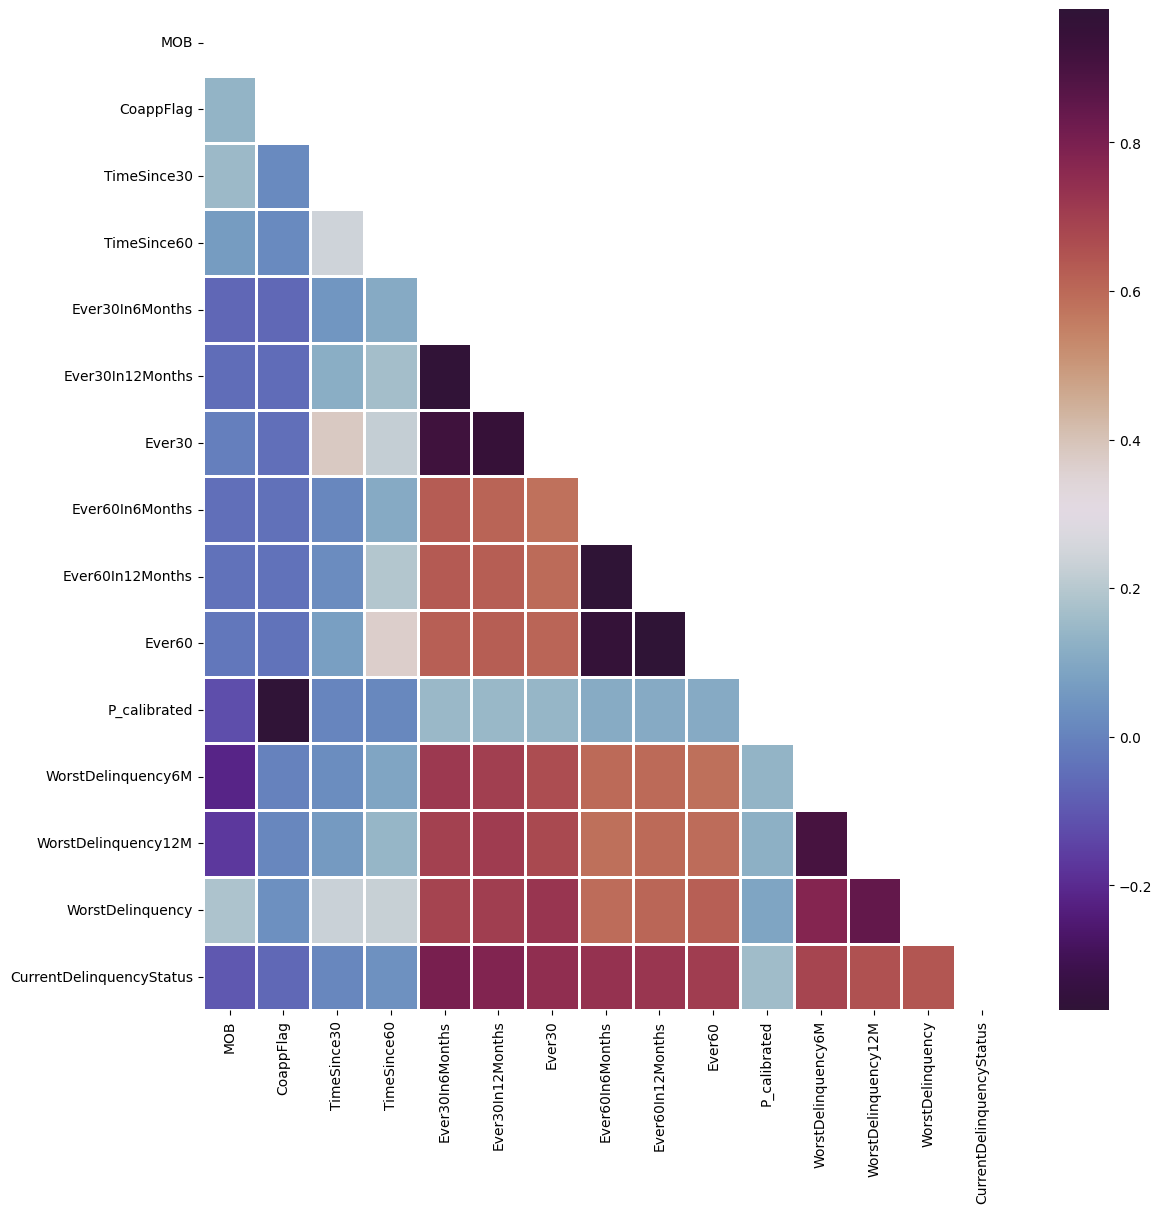

In [43]:
# calculate pair-wise correlations between them
corrmat = X[X.columns].corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,13))
sns.heatmap(corrmat, cmap='twilight_shifted', cbar=True, linewidths=1, yticklabels=1  , mask=mask)

In [44]:

correlation_matrix = X[X.columns].corr()

# Identify features that have a correlation greater than 0.8 with another feature
highly_correlated_features = set()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        # We check if the value is greater than 0.8 and less than 1 
        # because a feature always has a correlation of 1 with itself
        if (correlation_matrix[col][idx] > 0.85 ) and correlation_matrix[col][idx] < 1:  # or correlation_matrix[col][idx] < -0.85
            highly_correlated_features.add(col)
            highly_correlated_features.add(idx)

print(list(highly_correlated_features))


['Ever60In6Months', 'Ever60In12Months', 'Ever60', 'WorstDelinquency12M', 'Ever30', 'WorstDelinquency6M', 'Ever30In12Months', 'Ever30In6Months']


In [45]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrmat[mask] = np.nan
(corrmat
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format("{:.2f}"))


,MOB,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus
MOB,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CoappFlag,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince30,0.15,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince60,0.07,0.02,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In6Months,-0.07,-0.06,0.05,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In12Months,-0.05,-0.06,0.12,0.17,0.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30,-0.01,-0.05,0.38,0.22,0.92,0.95,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In6Months,-0.05,-0.04,0.01,0.11,0.63,0.61,0.58,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In12Months,-0.04,-0.04,0.02,0.19,0.63,0.62,0.59,0.98,nan,nan,nan,nan,nan,nan,nan
Ever60,-0.03,-0.04,0.07,0.37,0.62,0.62,0.61,0.96,0.98,nan,nan,nan,nan,nan,nan


<Figure size 1200x1200 with 0 Axes>

In [46]:
data.to_csv('BSC_mani.csv', index=False)



toKeep

data

In [47]:
data

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
228424,7733249,2022-11-30,8,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.061602,0,1,1,0,NaN,0
157034,7241730,2022-12-31,21,2021-03-12,0,0.0,0.0,0,0,0,0,0,0,0.059782,0,0,1,0,NaN,0
177344,7274509,2022-05-31,11,2021-06-28,0,0.0,0.0,0,0,0,0,0,0,0.169907,0,1,1,0,4.595843,0
214629,7700495,2022-09-30,9,2021-12-16,0,0.0,0.0,0,0,0,0,0,0,0.060270,1,1,1,1,27.662599,0
228444,7733264,2022-09-30,6,2022-03-22,0,0.0,0.0,0,0,0,0,0,0,0.052036,0,0,0,0,3.654435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312375,7143407,2021-01-31,10,2020-03-06,1,0.0,0.0,0,0,0,0,0,0,0.047438,1,1,1,0,1.877308,0
29320,5406707,2019-11-30,13,2018-10-11,0,0.0,0.0,0,0,0,0,0,0,0.051629,1,1,1,0,4.595843,0
79180,7110646,2020-12-31,13,2019-11-29,0,0.0,0.0,0,0,0,0,0,0,0.045480,0,1,1,0,NaN,0
2759,5079033,2021-06-30,41,2018-01-26,0,0.0,0.0,0,0,0,0,0,0,0.054885,1,1,1,1,27.662599,0


In [48]:
data.CurrentDelinquencyStatus.value_counts()

CurrentDelinquencyStatus
0    8206
1     535
2     241
3     199
Name: count, dtype: int64

In [51]:
data[(data.CurrentDelinquencyStatus == 1) & (data.WorstDelinquency6M == 0)]

,AccountNumber,SnapshotDate,MOB,DisbursedDate,CoappFlag,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,P_calibrated,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,CurrentDelinquencyStatus,Score,Ever90_12M
